Import Libraries

In [1]:
import math 
import random
from math import log as log
from math import e
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Entropy Functions

In [14]:
def entropy(base,a,b):
    try:
        var =  abs(((a)/(a+b)) * log(((a)/(a+b)),base)) - (((b)/(a+b)) * log(((b)/(a+b)),base))
        return var
    except (ValueError):
        return 0

def entropy_info_gain(base,pa,pb,c1a,c1b,c2a,c2b):
    return (entropy(base,pa,pb))-((((c1a+c1b)/(pa+pb))*entropy(base,c1a,c1b)) + (((c2a+c2b)/(pa+pb))*entropy(base,c2a,c2b)))

entropy_info_gain(2,22,13,18,2,4,11)

0.3252048756090272

Df and calculations

In [3]:
ent_list = []
blue_list = []
red_list = []
blue_prob_list = []

for x in range (10000):
    blue = random.uniform(0, 4)
    red = abs(4-blue)
    a = entropy(2,red,blue)
    b = blue/(blue+red)
    ent_list.append(a)
    blue_list.append(blue)
    red_list.append(red)
    blue_prob_list.append(b)


df = pd.DataFrame({"Blue": blue_list, "Red": red_list,"Entropy": ent_list, "Probability of Blue": blue_prob_list})
df = df[['Red', 'Blue', 'Probability of Blue', 'Entropy']]
df
    

,Red,Blue,Probability of Blue,Entropy
0,1.274550,2.725450,0.681363,0.902894
1,2.045452,1.954548,0.488637,0.999627
2,1.522762,2.477238,0.619310,0.958528
3,3.923596,0.076404,0.019101,0.136363
4,3.100507,0.899493,0.224873,0.768967
5,0.508608,3.491392,0.872848,0.549576
6,2.344550,1.655450,0.413862,0.978484
7,2.788676,1.211324,0.302831,0.884724
8,3.847676,0.152324,0.038081,0.233424
9,2.390252,1.609748,0.402437,0.972358


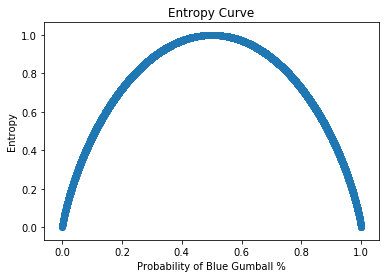

In [4]:
plt.scatter(blue_prob_list,ent_list)
plt.xlabel('Probability of Blue Gumball %')
plt.ylabel('Entropy')
plt.title('Entropy Curve')

Gini

In [7]:
#Gini Function
#a anb b are the quantities of each class
def gini(a,b):
    a1 = (a/(a+b))**2
    b1 = (b/(a+b))**2
    return 1 - (a1 + b1)

In [11]:
def gini_info_gain(pa,pb,c1a,c1b,c2a,c2b):
    return (gini(pa,pb))-((((c1a+c1b)/(pa+pb))*gini(c1a,c1b)) + (((c2a+c2b)/(pa+pb))*gini(c2a,c2b)))

gini_info_gain(22,13,18,2,4,11)

0.1964625850340137

In [9]:
#Blank Lists
gini_list = []
blue_list = []
red_list = []
blue_prob_list = []

#Looping Gini function on random blue and red float amounts
for x in range (10000):
    blue = random.uniform(0, 4)
    red = abs(4-blue)
    a = gini(red,blue)
    b = blue/(blue+red)
    gini_list.append(a)
    blue_list.append(blue)
    red_list.append(red)
    blue_prob_list.append(b)

#Dataframe of amount of blue, red, Probability of blue, and gini score
df = pd.DataFrame({"Blue": blue_list, "Red": red_list,"Gini Score": gini_list, "Probability of Blue": blue_prob_list})
df = df[['Red', 'Blue', 'Probability of Blue', 'Gini Score']]
df

,Red,Blue,Probability of Blue,Gini Score
0,3.635861,0.364139,0.091035,0.165495
1,0.564299,3.435701,0.858925,0.242345
2,3.148396,0.851604,0.212901,0.335148
3,2.961139,1.038861,0.259715,0.384527
4,0.170536,3.829464,0.957366,0.081633
5,2.111280,1.888720,0.472180,0.498452
6,0.887716,3.112284,0.778071,0.345353
7,0.108485,3.891515,0.972879,0.052771
8,3.876046,0.123954,0.030989,0.060056
9,0.013663,3.986337,0.996584,0.006808


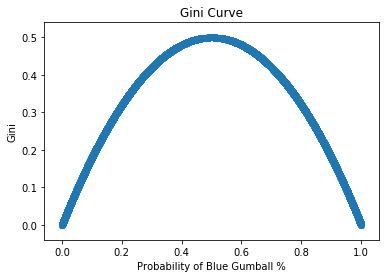

In [10]:
plt.scatter(blue_prob_list,gini_list)
plt.xlabel('Probability of Blue Gumball %')
plt.ylabel('Gini')
plt.title('Gini Curve')